In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [31]:
import matplotlib.pyplot as plt

In [6]:
oed_bli = pd.read_csv("data/oecd_bli_2015.csv", 
                      thousands = ",")

In [8]:
gdp_per_capita = pd.read_csv("data/gdp_per_capita.csv",
                            thousands = ",",
                            delimiter = "\t",
                            encoding = "latin1",
                            na_values = "n/a")

In [10]:
oed_bli["INDICATOR"].unique()

array(['HO_BASE', 'HO_HISH', 'HO_NUMR', 'IW_HADI', 'IW_HNFW', 'JE_EMPL',
       'JE_JT', 'JE_LTUR', 'JE_PEARN', 'SC_SNTWS', 'ES_EDUA', 'ES_STCS',
       'ES_EDUEX', 'EQ_AIRP', 'EQ_WATER', 'CG_TRASG', 'CG_VOTO', 'HS_LEB',
       'HS_SFRH', 'SW_LIFS', 'PS_SFRV', 'PS_REPH', 'WL_EWLH', 'WL_TNOW'], dtype=object)

In [11]:
oed_bli[(oed_bli["INDICATOR"] == "SW_LIFS") & (oed_bli["INEQUALITY"] == "TOT")]

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
2669,AUS,Australia,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,units,NaN,NaN,7.3,NaN,NaN
2670,AUT,Austria,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,units,NaN,NaN,6.9,NaN,NaN
2671,BEL,Belgium,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,units,NaN,NaN,6.9,NaN,NaN
2672,CAN,Canada,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,units,NaN,NaN,7.3,NaN,NaN
2673,CZE,Czech Republic,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,units,NaN,NaN,6.5,NaN,NaN
2674,DNK,Denmark,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,units,NaN,NaN,7.5,NaN,NaN
2675,FIN,Finland,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,units,NaN,NaN,7.4,NaN,NaN
2676,FRA,France,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,units,NaN,NaN,6.5,NaN,NaN
2677,DEU,Germany,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,units,NaN,NaN,7.0,NaN,NaN
2678,GRC,Greece,SW_LIFS,Life satisfaction,L,Value,TOT,Total,AVSCORE,Average score,0,units,NaN,NaN,4.8,NaN,NaN


In [13]:
life_sat = oed_bli
columns_of_interest = ["Country", "INDICATOR", "INEQUALITY", "Value"]
life_sat_condition = (life_sat["INDICATOR"] == "SW_LIFS") & (life_sat["INEQUALITY"] == "TOT")
life_sat_by_country = life_sat[life_sat_condition][columns_of_interest]

In [14]:
life_sat_by_country.head()

,Country,INDICATOR,INEQUALITY,Value
2669,Australia,SW_LIFS,TOT,7.3
2670,Austria,SW_LIFS,TOT,6.9
2671,Belgium,SW_LIFS,TOT,6.9
2672,Canada,SW_LIFS,TOT,7.3
2673,Czech Republic,SW_LIFS,TOT,6.5


In [18]:
gpd_pc = gdp_per_capita
columns_of_interest_gpd_pc = ["Country", "2015"]
gpd_pc [columns_of_interest_gpd_pc].head()
gpd_pc_by_country = gpd_pc [columns_of_interest_gpd_pc]

In [22]:
life_sat_gpd = pd.merge(gpd_pc_by_country, life_sat_by_country, on="Country").head()

In [24]:
life_sat_gpd.head()
columns_of_interest_result = ["Country", "2015", "Value"]
life_sat_gpd_result =  life_sat_gpd [columns_of_interest_result]

In [26]:
life_sat_gpd_result.columns = ["Country", "PIB", "Satisfaction"]

In [27]:
life_sat_gpd_result.head()

,Country,PIB,Satisfaction
0,Australia,50961.865,7.3
1,Austria,43724.031,6.9
2,Belgium,40106.632,6.9
3,Brazil,8669.998,7.0
4,Canada,43331.961,7.3


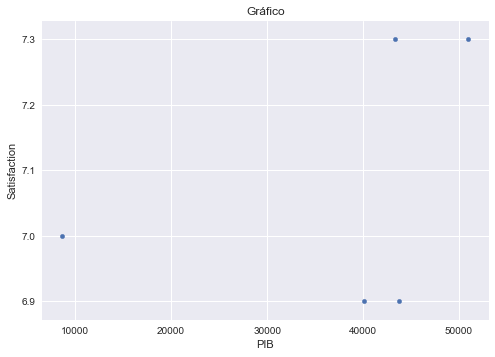

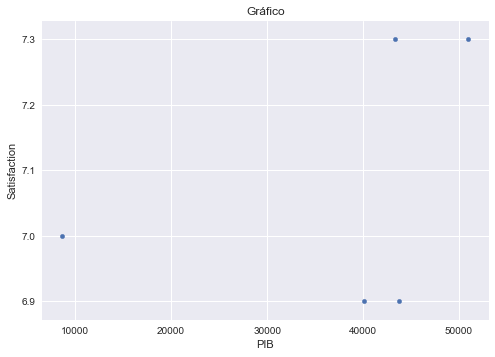

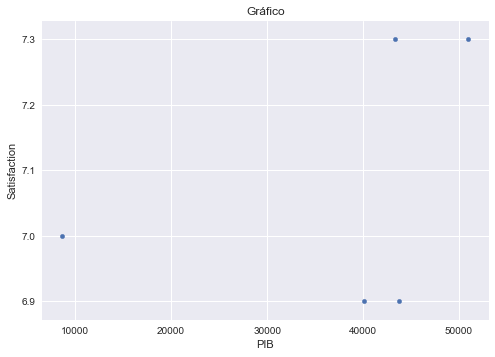

In [32]:
life_sat_gpd_result.plot(kind="scatter", x = "PIB", y = "Satisfaction", title = "Gráfico")
plt.show()